In [ ]:
!pip install -q kaggle

!mkdir -p ~/.kaggle

from google.colab import files
uploaded = files.upload()

!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d kazanova/sentiment140

!unzip sentiment140.zip

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
100% 80.9M/80.9M [00:00<00:00, 817MB/s]
100% 80.9M/80.9M [00:00<00:00, 767MB/s]
Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# Data preprocessing

In [ ]:
df.columns = ['target', 'ID', 'date', 'flag', 'user', 'text']
df

,target,ID,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ID      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
df.value_counts('target')

,count
target,
0,800000
4,800000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)

In [ ]:
df['label'] = df['target'].apply(lambda x: 1 if x == 4 else 0)

df[['clean_text', 'label']].sample(5)

,clean_text,label
1268985,woah 101 followers yay,1
1306458,haha oh ash your a freak ilu,1
222487,looks like the cavs are done,0
1572362,a good clientwhat just a good client,1
928691,happy birthday bono one love,1


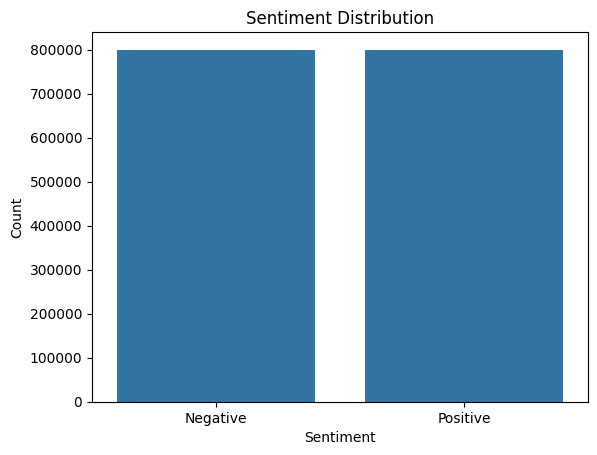

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='label')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

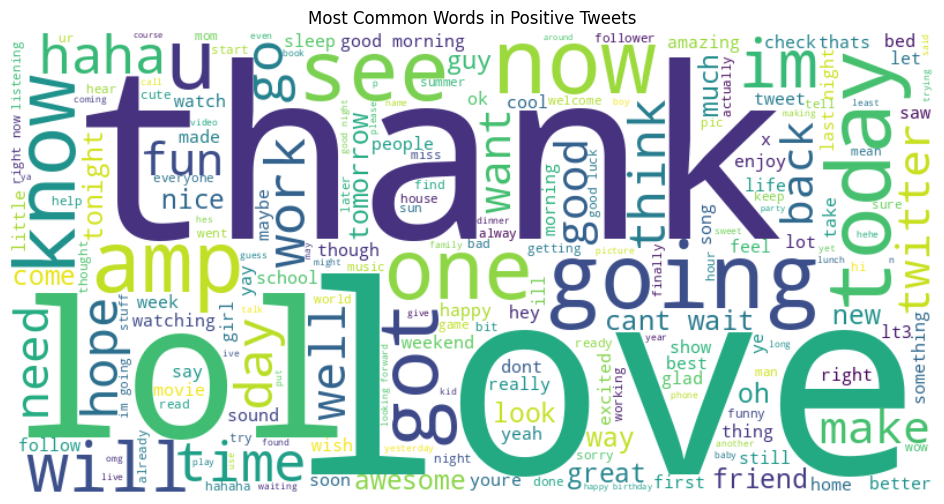

In [ ]:
from wordcloud import WordCloud

positive_text = " ".join(df[df['label'] == 1]['clean_text'].tolist())
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Positive Tweets')
plt.show()

In [ ]:
df_small = df[['clean_text', 'label']].sample(20000, random_state=42).reset_index(drop=True)

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

bert_model.eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
def get_bert_embedding(text):
    with torch.no_grad():
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=128)
        outputs = bert_model(**inputs)
        cls_embedding = outputs.last_hidden_state[:, 0, :]  # [CLS] token
    return cls_embedding.squeeze().numpy()

In [ ]:
from tqdm import tqdm
import numpy as np

texts = df_small['clean_text'].tolist()

embeddings = np.array([get_bert_embedding(text) for text in tqdm(texts)])
labels = df_small['label'].values

100%|██████████| 20000/20000 [34:46<00:00,  9.58it/s]


In [ ]:
!pip install -q xgboost

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    embeddings, labels, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Base models
svm = SVC(probability=True)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Meta-model
meta_model = LogisticRegression()

In [ ]:
from sklearn.ensemble import StackingClassifier

stack_model = StackingClassifier(
    estimators=[
        ('svm', svm),
        ('xgb', xgb)
    ],
    final_estimator=meta_model,
    passthrough=True,
    cv=5,
    n_jobs=-1
)

In [ ]:
stack_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(cv=5,
                   estimators=[('svm', SVC(probability=True)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=Non...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=LogisticRegression(), n_jobs=-1,
                   passthrough=True)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = stack_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.77425

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      1987
           1       0.78      0.77      0.78      2013

    accuracy                           0.77      4000
   macro avg       0.77      0.77      0.77      4000
weighted avg       0.77      0.77      0.77      4000



In [ ]:
#Train accuracy
y_pred = stack_model.predict(X_train)
print("Accuracy:", accuracy_score(y_train, y_pred))

Accuracy: 0.889875


In [ ]:
def evaluate_model(model, model_name):
    print(f"\nTraining and Evaluating: {model_name}")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

In [ ]:
svm_model = SVC()
evaluate_model(svm_model, "SVM")


Training and Evaluating: SVM
Accuracy: 0.7440
Confusion Matrix:
[[1469  518]
 [ 506 1507]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1987
           1       0.74      0.75      0.75      2013

    accuracy                           0.74      4000
   macro avg       0.74      0.74      0.74      4000
weighted avg       0.74      0.74      0.74      4000



In [ ]:
lr_model = LogisticRegression(max_iter=1000)
evaluate_model(lr_model, "Logistic Regression")


Training and Evaluating: Logistic Regression
Accuracy: 0.7495
Confusion Matrix:
[[1477  510]
 [ 492 1521]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.75      1987
           1       0.75      0.76      0.75      2013

    accuracy                           0.75      4000
   macro avg       0.75      0.75      0.75      4000
weighted avg       0.75      0.75      0.75      4000



In [ ]:
example = "Can't believe they actually published this garbage."
example = clean_text(example)
example = get_bert_embedding(example)
example = np.array(example).reshape(1, -1)
stack_model.predict(example)

array([0])

In [ ]:
import joblib

joblib.dump(stack_model, 'sentiment_stack_model.pkl')


['sentiment_stack_model.pkl']

In [ ]:
import pickle

with open('bert_tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)